In [1]:
import numpy as np
import networkx as nx
import random
from networkx.generators.random_graphs import erdos_renyi_graph
from tools import *

# Network parameters

In [2]:
N=20 #router number
m=3 #shortest path number
sim_num=1
memsize=10000 #in mb
min_vert_degree=1 #min vertex degree
router_rate_reduction=[0.2,0.5] #router max data rate reduction range in comparison with the maximum demand from the links
router_delay_coefficient=8 #defines delay time while the package passing through router
link_delay_coefficient=4 #defines delay time while the package passing through link

file_name_full_graph='full_graph_{}_{}.txt'.format(N,sim_num)
file_network='network_{}_{}.txt'.format(N,sim_num)

file_name_full_graph_optimal_path='full_graph_and_prime_shortest_path_{}_{}.txt'.format(N,sim_num)
file_name_cluster_graph='cluster_graph_{}_{}.txt'.format(N,sim_num)
file_name_shortest_path='full_graph_shortest_path_{}_{}.txt'.format(N,sim_num)
file_name_prime_routers_shortest_path='prime_graph_shortest_path_{}_{}.txt'.format(N,sim_num)
file_name_prime_graph='prime_graph_{}_{}.txt'.format(N,sim_num)

In [3]:
Umax=[100000, 150000, 200000] #link maximum data rate
prob=[0.5,0.3,0.2] #probabilities of link maximum data rates

# Graph generation

In [4]:
p=32*2/(20*19) #ARPANET's edge probability

In [5]:
p

0.16842105263157894

In [6]:
while True: #generating connected graph
    g = erdos_renyi_graph(N, p)
    d=dict(g.degree)
    
    min_degree=min(d.items(), key=lambda x: x[1])[1]
    
    if min_degree>=min_vert_degree and nx.is_connected(g):
        break
    

In [7]:
print('vertices', g.nodes) 

vertices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [8]:
print('edges', g.edges) 

edges [(0, 1), (0, 3), (0, 7), (1, 4), (1, 11), (1, 13), (1, 17), (2, 4), (2, 9), (3, 6), (3, 15), (3, 17), (4, 9), (4, 18), (5, 11), (6, 8), (6, 10), (6, 17), (7, 17), (8, 17), (9, 10), (9, 14), (9, 16), (10, 13), (10, 14), (10, 17), (10, 18), (12, 14), (12, 15), (12, 16), (12, 18), (13, 14), (15, 16), (16, 19)]


In [9]:
d=dict(g.degree)
    
min_degree=min(d.items(), key=lambda x: x[1])

print('min vertex degree', min_degree[1])

min vertex degree 1


## Generating network 

In [10]:
U={} 

for e in g.edges: 
    x,y=e
    U[e]=np.random.choice(Umax, p=prob) #generating max link data rate
    U[(y,x)]=U[e]

In [11]:
print('link capacities', U)

link capacities {(0, 1): 150000, (1, 0): 150000, (0, 3): 150000, (3, 0): 150000, (0, 7): 150000, (7, 0): 150000, (1, 4): 200000, (4, 1): 200000, (1, 11): 100000, (11, 1): 100000, (1, 13): 150000, (13, 1): 150000, (1, 17): 150000, (17, 1): 150000, (2, 4): 200000, (4, 2): 200000, (2, 9): 100000, (9, 2): 100000, (3, 6): 100000, (6, 3): 100000, (3, 15): 100000, (15, 3): 100000, (3, 17): 100000, (17, 3): 100000, (4, 9): 150000, (9, 4): 150000, (4, 18): 100000, (18, 4): 100000, (5, 11): 150000, (11, 5): 150000, (6, 8): 100000, (8, 6): 100000, (6, 10): 100000, (10, 6): 100000, (6, 17): 100000, (17, 6): 100000, (7, 17): 200000, (17, 7): 200000, (8, 17): 100000, (17, 8): 100000, (9, 10): 100000, (10, 9): 100000, (9, 14): 100000, (14, 9): 100000, (9, 16): 100000, (16, 9): 100000, (10, 13): 100000, (13, 10): 100000, (10, 14): 200000, (14, 10): 200000, (10, 17): 200000, (17, 10): 200000, (10, 18): 200000, (18, 10): 200000, (12, 14): 100000, (14, 12): 100000, (12, 15): 150000, (15, 12): 150000, (12

In [12]:
router_data_rate=[0]*N

for e in g.edges: 
    x,y=e
    router_data_rate[x]+=U[(y,x)]
    router_data_rate[y]+=U[(x,y)]
    

reduction=np.random.uniform(low=router_rate_reduction[0], high=router_rate_reduction[1], size=(N,))

router_data_rate*=reduction

router_data_rate=np.maximum(1, router_data_rate//10000)*10000 #making them a multiple of 10000

In [13]:
print('router data rates', router_data_rate)

router data rates [210000. 320000. 130000. 150000. 250000.  50000. 150000. 100000.  40000.
 260000. 240000.  50000. 200000. 120000. 140000. 130000. 190000. 410000.
 100000.  20000.]


In [14]:
weight={}
const=1e6

for e in g.edges: 
    x,y=e
    weight[(x,y)]=link_delay_coefficient/U[(x,y)] + router_delay_coefficient/router_data_rate[y]   
    weight[(y,x)]=link_delay_coefficient/U[(y,x)] + router_delay_coefficient/router_data_rate[x] 

In [15]:
weight

{(0, 1): 5.166666666666667e-05,
 (1, 0): 6.476190476190476e-05,
 (0, 3): 7.999999999999999e-05,
 (3, 0): 6.476190476190476e-05,
 (0, 7): 0.00010666666666666667,
 (7, 0): 6.476190476190476e-05,
 (1, 4): 5.2000000000000004e-05,
 (4, 1): 4.5e-05,
 (1, 11): 0.0002,
 (11, 1): 6.500000000000001e-05,
 (1, 13): 9.333333333333334e-05,
 (13, 1): 5.166666666666667e-05,
 (1, 17): 4.617886178861789e-05,
 (17, 1): 5.166666666666667e-05,
 (2, 4): 5.2000000000000004e-05,
 (4, 2): 8.153846153846153e-05,
 (2, 9): 7.076923076923078e-05,
 (9, 2): 0.00010153846153846153,
 (3, 6): 9.333333333333334e-05,
 (6, 3): 9.333333333333334e-05,
 (3, 15): 0.00010153846153846153,
 (15, 3): 9.333333333333334e-05,
 (3, 17): 5.9512195121951225e-05,
 (17, 3): 9.333333333333334e-05,
 (4, 9): 5.7435897435897434e-05,
 (9, 4): 5.8666666666666665e-05,
 (4, 18): 0.00012000000000000002,
 (18, 4): 7.2e-05,
 (5, 11): 0.0001866666666666667,
 (11, 5): 0.0001866666666666667,
 (6, 8): 0.00024,
 (8, 6): 9.333333333333334e-05,
 (6, 10): 

# Saving graph to a file

In [16]:
WriteGraph(file_name_full_graph, N, g.edges, weight)

# Saving network to file

In [17]:
WriteNetwork(file_network, N, g.edges, U, router_data_rate)

# Drawing the network

In [18]:
mapping={}

for i in range(N):
    mapping[i]=i+1 #shifting labels by one so they start from 1

In [19]:
g = nx.relabel_nodes(g, mapping, copy=False)

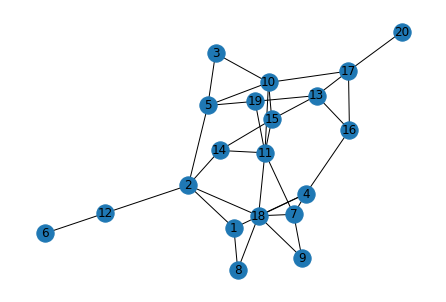

In [20]:
nx.draw(g, with_labels=True)